In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 

In [13]:
data=pd.read_csv('data.csv')
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [14]:
data.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [15]:
selected_features = ['Engine HP', 'highway MPG', 'city mpg', 'Engine Cylinders']
X=data[selected_features]
y=data['MSRP']

In [16]:
X.head()


,Engine HP,highway MPG,city mpg,Engine Cylinders
0,335.0,26,19,6.0
1,300.0,28,19,6.0
2,300.0,28,20,6.0
3,230.0,28,18,6.0
4,230.0,28,18,6.0


In [17]:
y.head()

0    46135
1    40650
2    36350
3    29450
4    34500
Name: MSRP, dtype: int64

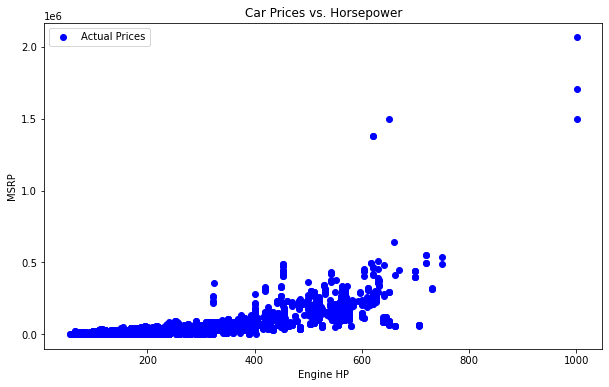

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(X['Engine HP'], y, label='Actual Prices', color='blue')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.title('Car Prices vs. Horsepower')
plt.legend()
plt.show()

In [19]:
X=X.fillna(0)
y=y.fillna(0)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
from sklearn.neighbors import KNeighborsRegressor
knn_model=KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [24]:
def get_user_input():
    print("Please provide the following car features:")
    horsepower=float(input("Horsepower: "))
    city_mpg=float(input("City MPG: "))
    highway_mpg=float(input("Highway MPG: "))
    engine_size=float(input("Engine Size: "))
    return scaler.transform([[horsepower, city_mpg, highway_mpg, engine_size]])

user_input = get_user_input()

knn_price = knn_model.predict(user_input)
rf_price = rf_model.predict(user_input)

print(f"KNN Predicted Price: ${knn_price[0]:,.2f}")
print(f"Random Forest Predicted Price: ${rf_price[0]:,.2f}")

Please provide the following car features:
Horsepower: 300
City MPG: 18
Highway MPG: 28
Engine Size: 6
KNN Predicted Price: $51,234.00
Random Forest Predicted Price: $48,405.76


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [25]:
data['Engine Cylinders'].unique()

array([ 6.,  4.,  5.,  8., 12.,  0., nan, 10.,  3., 16.])

In [26]:
from sklearn.metrics import r2_score
knn_predictions = knn_model.predict(X_test_scaled)
rf_predictions = rf_model.predict(X_test_scaled)

knn_r2 = r2_score(y_test, knn_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("K-Nearest Neighbors(KNN) Metrics:")
print(f"R2 Score: {knn_r2:.2f}")

print("\nRandom Forest Metrics:")
print(f"R2 Score: {rf_r2:.2f}")

K-Nearest Neighbors(KNN) Metrics:
R2 Score: 0.88

Random Forest Metrics:
R2 Score: 0.93
